<a href="https://colab.research.google.com/github/ounospanas/AIDL_A_02/blob/main/notebooks_solutions/AIDL_A02_transfer_learning_data_augmentation_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Keras functional API tutorial

https://colab.research.google.com/github/keras-team/keras-io/blob/master/guides/ipynb/functional_api.ipynb#scrollTo=rgyKgt3jgi-S

Dummy ResNet (Custom)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
def residual_block(previous_block):
  # TO DO
  # Add two convolutional layers (64, 3, same padding), followed by ReLU
  # Then add them with the previous_block output
  x = layers.Conv2D(64, 3, activation="relu", padding="same")(previous_block)
  x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
  block_output = layers.add([x, previous_block])
  return block_output

In [3]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(2)(x)

# TO DO
# Add two convolutional layers (64, 3, same padding), followed by ReLU
# Then add them with the block_1_output
# do it 3 times using a for loop
# the last output (final residual block) should be named block_4_output

block_2_output = residual_block(block_1_output)
block_3_output = residual_block(block_2_output)
block_4_output = residual_block(block_3_output)
####### 

x = layers.Conv2D(64, 3, activation="relu")(block_4_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="dummy_resnet")
#model.summary()

In [4]:
model.summary()

Model: "dummy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 64)   18496       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 14, 14, 64)   0           conv2d_1[0][0]                   
_______________________________________________________________________________________

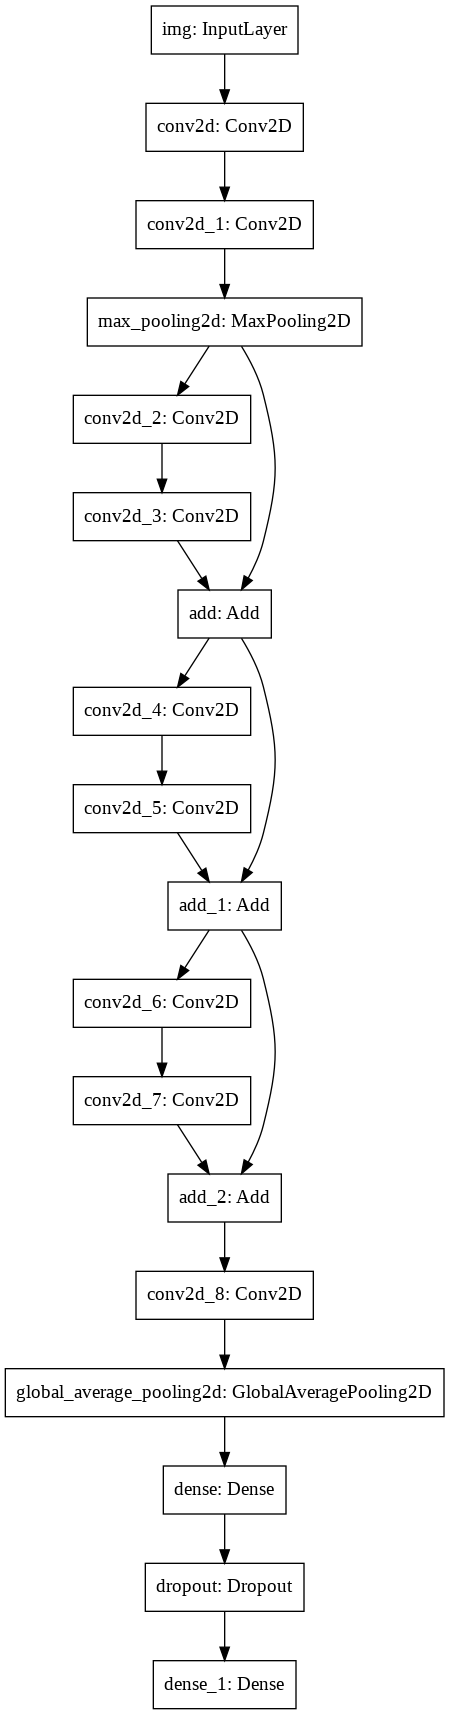

In [5]:
keras.utils.plot_model(model, "my_resnet_model.png")

# Download dogs vs cats data
code used for downloading and cleaning the images (https://keras.io/examples/vision/image_classification_from_scratch/)

In [6]:
# download Dataset
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   134M      0  0:00:05  0:00:05 --:--:--  139M


In [7]:
! mkdir dogs_cats
! unzip kagglecatsanddogs_3367a.zip  -d dogs_cats

Streaming output truncated to the last 5000 lines.
  inflating: dogs_cats/PetImages/Dog/5500.jpg  
  inflating: dogs_cats/PetImages/Dog/5501.jpg  
  inflating: dogs_cats/PetImages/Dog/5502.jpg  
  inflating: dogs_cats/PetImages/Dog/5503.jpg  
  inflating: dogs_cats/PetImages/Dog/5504.jpg  
  inflating: dogs_cats/PetImages/Dog/5505.jpg  
  inflating: dogs_cats/PetImages/Dog/5506.jpg  
  inflating: dogs_cats/PetImages/Dog/5507.jpg  
  inflating: dogs_cats/PetImages/Dog/5508.jpg  
  inflating: dogs_cats/PetImages/Dog/5509.jpg  
  inflating: dogs_cats/PetImages/Dog/551.jpg  
  inflating: dogs_cats/PetImages/Dog/5510.jpg  
  inflating: dogs_cats/PetImages/Dog/5511.jpg  
  inflating: dogs_cats/PetImages/Dog/5512.jpg  
  inflating: dogs_cats/PetImages/Dog/5513.jpg  
  inflating: dogs_cats/PetImages/Dog/5514.jpg  
  inflating: dogs_cats/PetImages/Dog/5515.jpg  
  inflating: dogs_cats/PetImages/Dog/5516.jpg  
  inflating: dogs_cats/PetImages/Dog/5517.jpg  
  inflating: dogs_cats/PetImages/Dog/5

In [8]:
import os
import tensorflow as tf


num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("dogs_cats/PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 1590 images


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

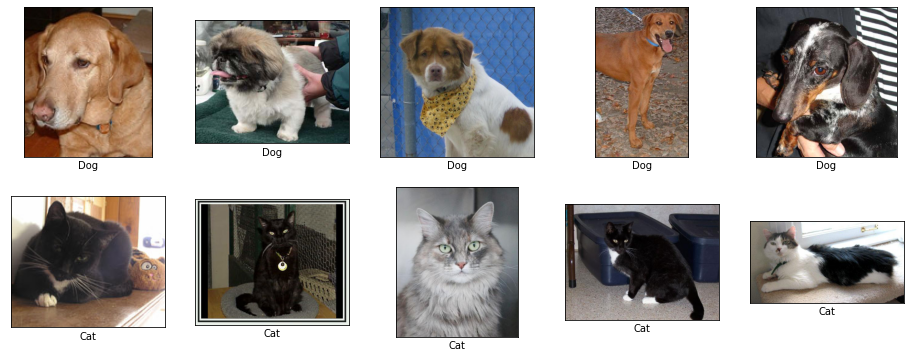

In [10]:
dogs_dir = 'dogs_cats/PetImages/Dog/'
cats_dir = 'dogs_cats/PetImages/Cat/'
classes = ['Dog', 'Cat']
cats_img = [im for im in os.listdir('dogs_cats/PetImages/Cat')
              if any(im.endswith(ext) for ext in ['jpg','png'])]
dogs_img = [im for im in os.listdir('dogs_cats/PetImages/Dog')
              if any(im.endswith(ext) for ext in ['jpg','png'])]
plt.figure(figsize=(16, 16))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    if i < 5:
      path = dogs_dir + dogs_img[i]
      plt.xlabel(classes[0])
    else:
      path = cats_dir + cats_img[i]
      plt.xlabel(classes[1])
    img = plt.imread(path)
    plt.imshow(img)

In [11]:
images = []
labels = []
shape = 100, 100

for image in dogs_img:
    temp_img = cv2.imread(dogs_dir + image)
    temp_img = cv2.resize(temp_img, shape)
    images.append(temp_img.reshape(-1,))
    labels.append(0)

for image in cats_img:
    temp_img = cv2.imread(cats_dir + image)
    temp_img = cv2.resize(temp_img, shape)
    images.append(temp_img.reshape(-1,))
    labels.append(1)

In [12]:
images = np.array(images)
images = images.astype('float32')/255.0

In [13]:
#split dataset
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(images,labels,test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape)

x_train = x_train.reshape(-1,100,100,3)
x_test = x_test.reshape(-1,100,100,3)

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

(18728, 30000) (4682, 30000)


# Transfer Learning

In [14]:
from tensorflow import keras
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

base_model = VGG16(
    weights='imagenet',
    input_shape=(100, 100, 3),
    include_top=False) # When setting `include_top=True` and loading `imagenet` weights, `input_shape` should be (224, 224, 3)

# Freeze base model
base_model.trainable =  False

# add layers to base model
inputs = keras.Input(shape=(100, 100, 3))

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
# x = keras.layers.GlobalAveragePooling2D()(x)

# Add final dense layer
outputs = keras.layers.Dense(1, activation = 'sigmoid')(x)

# Combine inputs and outputs to create model
model = keras.Model(inputs,outputs)

58892288/58889256 [==============================] - 1s 0us/step


In [15]:
# # build model architecture
# model = Sequential()
# model.add(ResNet50(weights='imagenet', include_top=False, input_shape=(100,100,3)))
# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [16]:
adam = Adam(learning_rate=0.001)
save_model = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=2)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1, shuffle = True, verbose=1, callbacks=[save_model])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
132/132 [==============================] - 78s 320ms/step - loss: 0.4222 - accuracy: 0.8281 - val_loss: 0.2926 - val_accuracy: 0.8692

Epoch 00001: val_loss improved from inf to 0.29264, saving model to best_model.h5
Epoch 2/10
132/132 [==============================] - 32s 241ms/step - loss: 0.2677 - accuracy: 0.8854 - val_loss: 0.2930 - val_accuracy: 0.8681

Epoch 00002: val_loss did not improve from 0.29264
Epoch 3/10
132/132 [==============================] - 32s 242ms/step - loss: 0.2402 - accuracy: 0.8991 - val_loss: 0.2863 - val_accuracy: 0.8692

Epoch 00003: val_loss improved from 0.29264 to 0.28628, saving model to best_model.h5
Epoch 4/10
132/132 [==============================] - 32s 242ms/step - loss: 0.2215 - accuracy: 0.9076 - val_loss: 0.2842 - val_accuracy: 0.8745

Epoch 00004: val_loss improved from 0.28628 to 0.28422, saving model to best_model.h5
Epoch 5/10
132/132 [==============================] - 32s 242ms/step - loss: 0.2060 - accuracy: 0.9136 - val_lo

# Image Augmentation

In [17]:
from sklearn.model_selection import train_test_split 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.1, random_state=0)
print(x_train.shape, x_val.shape)

(16855, 100, 100, 3) (1873, 100, 100, 3)


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


base_model = VGG16(
    weights='imagenet',
    input_shape=(100, 100, 3),
    include_top=False)

# Freeze base model
base_model.trainable =  False

# add layers to base model
inputs = keras.Input(shape=(100, 100, 3))

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
# x = keras.layers.GlobalAveragePooling2D()(x)

# Add final dense layer
outputs = keras.layers.Dense(1, activation = 'sigmoid')(x)

# Combine inputs and outputs to create model
model = keras.Model(inputs,outputs)

adam = Adam(learning_rate=0.001)
datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=False) # randomly flip images vertically

datagen.fit(x_train)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [19]:
save_model = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=2)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(datagen.flow(x_train, y_train, batch_size=32),
          steps_per_epoch=len(x_train) / 32, epochs=30, validation_data=(x_val, y_val), shuffle = True, callbacks=[save_model])

Epoch 1/30
526/526 [==============================] - 71s 128ms/step - loss: 0.3734 - accuracy: 0.8319 - val_loss: 0.3091 - val_accuracy: 0.8633

Epoch 00001: val_loss improved from inf to 0.30910, saving model to best_model.h5
Epoch 2/30
526/526 [==============================] - 65s 122ms/step - loss: 0.3160 - accuracy: 0.8563 - val_loss: 0.2717 - val_accuracy: 0.8729

Epoch 00002: val_loss improved from 0.30910 to 0.27172, saving model to best_model.h5
Epoch 3/30
526/526 [==============================] - 65s 122ms/step - loss: 0.2924 - accuracy: 0.8715 - val_loss: 0.2627 - val_accuracy: 0.8868

Epoch 00003: val_loss improved from 0.27172 to 0.26267, saving model to best_model.h5
Epoch 4/30
526/526 [==============================] - 65s 122ms/step - loss: 0.2865 - accuracy: 0.8696 - val_loss: 0.2686 - val_accuracy: 0.8751

Epoch 00004: val_loss did not improve from 0.26267
Epoch 5/30
526/526 [==============================] - 64s 122ms/step - loss: 0.2775 - accuracy: 0.8774 - val_lo